In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

df = pd.read_csv('data/sp_500/sp500hst.txt', parse_dates=True)


Populating the interactive namespace from numpy and matplotlib


We've just imported the dataframe, now let's see the columns on this dataframe

In [2]:
df.columns.values.tolist()

['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']

How many different Tickers (a.k.a. stocks) are there?

In [3]:
unique_stocks = set(df['Ticker'])
len(unique_stocks)

524

Let's just analyze the stock, date, volume of the 5 most important stocks

In [4]:
# Getting the 5 stocks with the biggest mean volume
relevant_variable = 'Volume'
grouped_by = df.groupby('Ticker', as_index=False)['Volume']
grouped_by = grouped_by.mean().sort_values('Volume', ascending=False)
relevant_stocks = grouped_by.head(5)['Ticker'].values.tolist()
relevant_stocks


['C', 'BAC', 'F', 'GE', 'INTC']

In [5]:
sub_df = df[['Ticker', 'Date', relevant_variable]]
sub_df = sub_df[sub_df['Ticker'].isin(relevant_stocks)]
sub_df.head(10)

,Ticker,Date,Volume
11366,BAC,20090821,2365971
11367,BAC,20090824,3166397
11368,BAC,20090825,2388167
11369,BAC,20090826,2038459
11370,BAC,20090827,1765370
11371,BAC,20090828,1880609
11372,BAC,20090831,1597104
11373,BAC,20090901,3347383
11374,BAC,20090902,2290782
11375,BAC,20090903,1765553


Converting datestamp to proper format

In [6]:
sub_df['Date'] = pd.to_datetime(sub_df['Date'].astype(str), format='%Y%m%d')
sub_df.head(10)

,Ticker,Date,Volume
11366,BAC,2009-08-21,2365971
11367,BAC,2009-08-24,3166397
11368,BAC,2009-08-25,2388167
11369,BAC,2009-08-26,2038459
11370,BAC,2009-08-27,1765370
11371,BAC,2009-08-28,1880609
11372,BAC,2009-08-31,1597104
11373,BAC,2009-09-01,3347383
11374,BAC,2009-09-02,2290782
11375,BAC,2009-09-03,1765553


Now let's sort them by date

In [7]:
sub_df = pd.DataFrame.sort_values(sub_df, 'Date')
sub_df.head(10)

,Ticker,Date,Volume
11366,BAC,2009-08-21,2365971
46241,GE,2009-08-21,906182
40508,F,2009-08-21,552832
17037,C,2009-08-21,13668188
56147,INTC,2009-08-21,551632
46242,GE,2009-08-24,855979
17038,C,2009-08-24,12022749
56148,INTC,2009-08-24,387095
40509,F,2009-08-24,935814
11367,BAC,2009-08-24,3166397


Let's only analyze stocks starting from October 2009

In [8]:
sub_df = sub_df.query("Date > '2009-09-30'")
sub_df.head(10)

,Ticker,Date,Volume
11393,BAC,2009-10-01,2478244
56174,INTC,2009-10-01,706487
17064,C,2009-10-01,4852104
40535,F,2009-10-01,1015308
46268,GE,2009-10-01,1134940
46269,GE,2009-10-02,1330917
40536,F,2009-10-02,558250
11394,BAC,2009-10-02,2263029
17065,C,2009-10-02,5885397
56175,INTC,2009-10-02,581798


Let's pivot the dataframe in order to more easily process it

In [9]:
pivoted_df = sub_df.pivot(index='Date', columns='Ticker', values=relevant_variable)
pivoted_df.head(10)

Ticker,BAC,C,F,GE,INTC
Date,,,,,
2009-10-01,2478244.0,4852104.0,1015308.0,1134940.0,706487.0
2009-10-02,2263029.0,5885397.0,558250.0,1330917.0,581798.0
2009-10-05,1546344.0,3028962.0,426786.0,739009.0,565664.0
2009-10-06,1959275.0,4770943.0,485007.0,956979.0,741853.0
2009-10-07,1531920.0,3691747.0,338689.0,609114.0,495263.0
2009-10-08,1375673.0,3446186.0,783549.0,773694.0,741993.0
2009-10-09,875033.0,2883527.0,326128.0,704068.0,559448.0
2009-10-12,1399723.0,3625194.0,1523726.0,586272.0,650872.0
2009-10-13,1503888.0,4553392.0,1003720.0,706429.0,1166526.0


Now let's plot this in a line chart

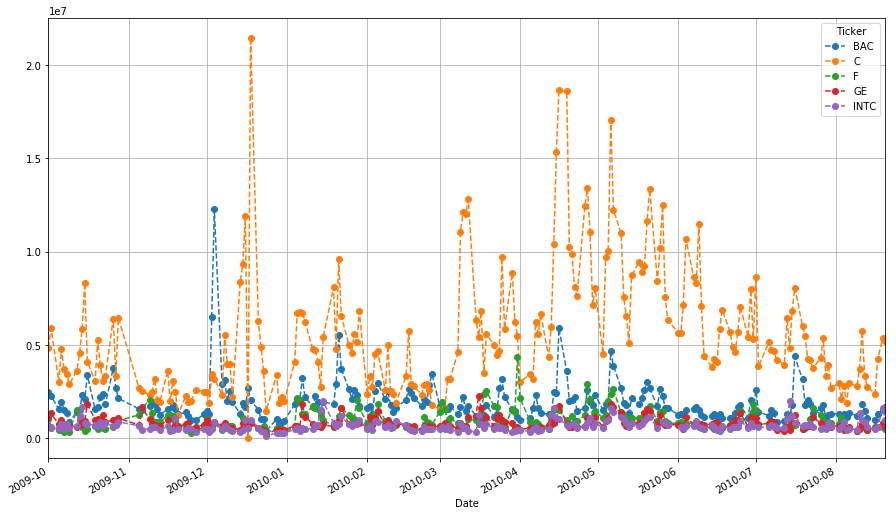

In [10]:
pivoted_df.plot(kind='line', style='--o', grid=True)

Let's try to make this graph fancier

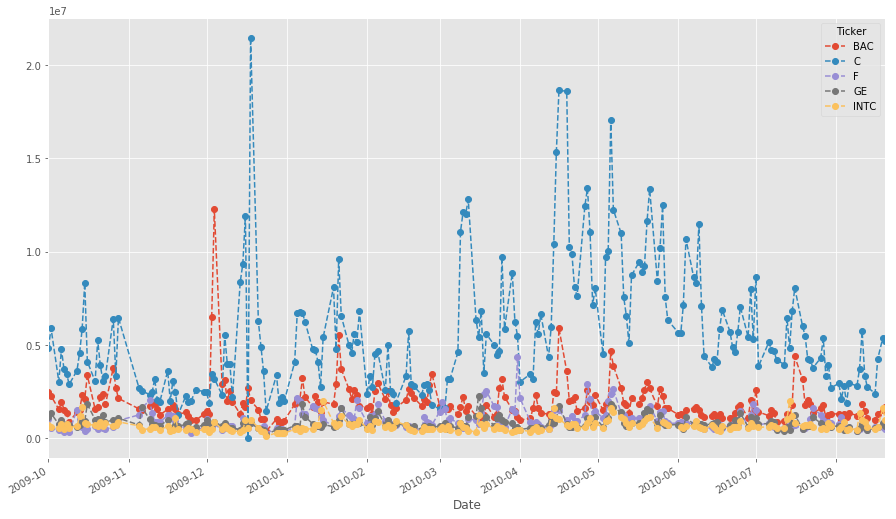

In [11]:
from matplotlib import style
style.use('ggplot')
pivoted_df.plot(kind='line', style='--o', grid=True)

Let's plot only the stock with the biggest volume

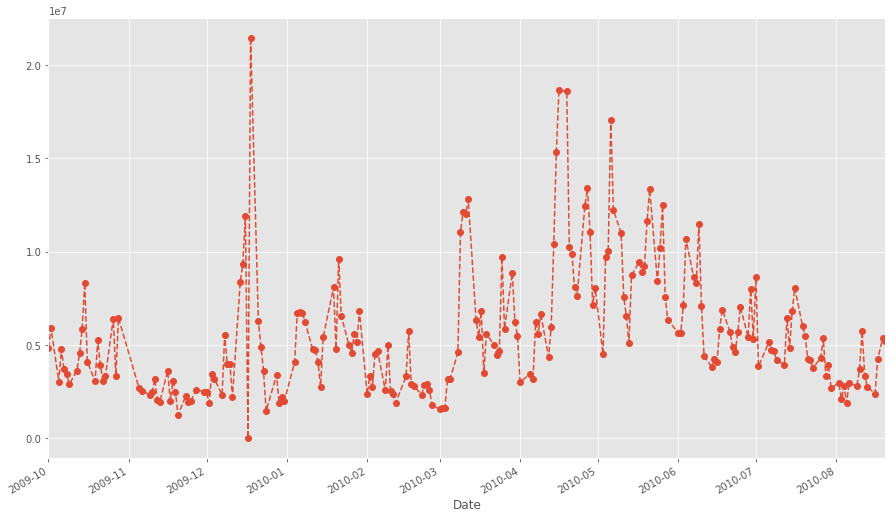

In [12]:
pivoted_df['C'].plot(kind='line', style='--o', grid=True)

Now let's try some moving window statistics, first with moving averages on a 5, 15 and 30 day windows

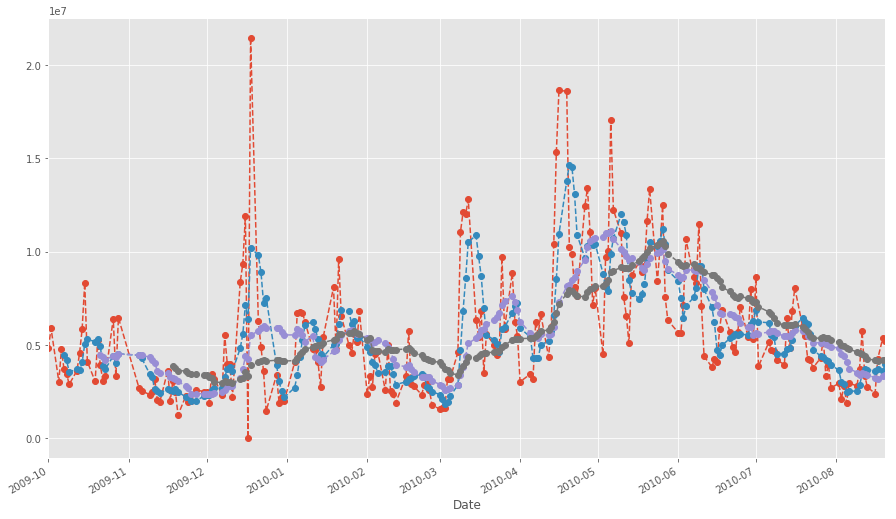

In [13]:
pivoted_df['C'].plot(kind='line', style='--o', grid=True)
pivoted_df['5ma_C'] = pivoted_df['C'].rolling(window=5).mean().plot(kind='line', style='--o', grid=True)
pivoted_df['15ma_C'] = pivoted_df['C'].rolling(window=15).mean().plot(kind='line', style='--o', grid=True)
pivoted_df['30ma_C'] = pivoted_df['C'].rolling(window=30).mean().plot(kind='line', style='--o', grid=True)

Now with exponentially weighted moving averages (also known as exponential smoothing) for alpha set to 0.5 and 0.1

This operation is expressed through the following equation: $y[n] = alpha * x[n] + (1-alpha) * y[n-1]$

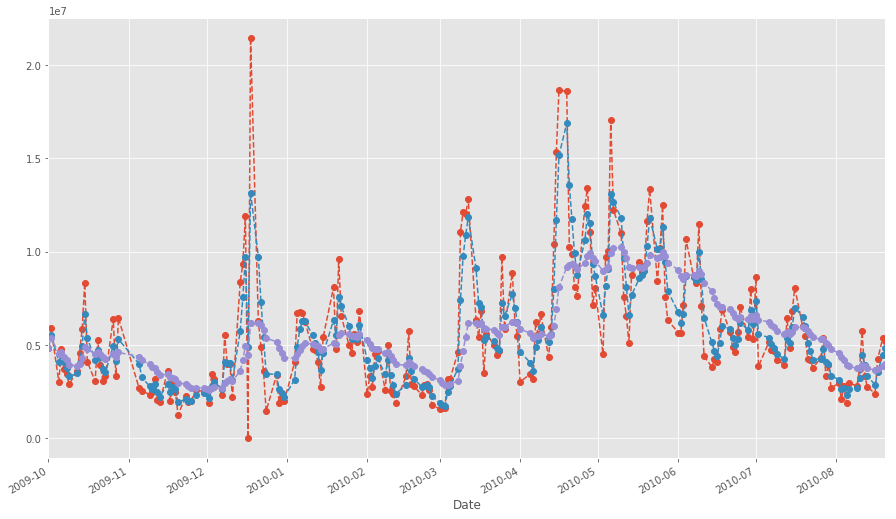

In [14]:
pivoted_df['C'].plot(kind='line', style='--o', grid=True)
pivoted_df['0.5ewma_C'] = pivoted_df['C'].ewm(alpha=0.5).mean().plot(kind='line', style='--o', grid=True)
pivoted_df['0.1ewma_C'] = pivoted_df['C'].ewm(alpha=0.1).mean().plot(kind='line', style='--o', grid=True)

Now let's create a new dataframe with the other remaining attributes, but only concerning the company with the biggest volume trade

In [15]:
relevant_variables = ['Ticker','Open', 'High', 'Low', 'Close', 'Volume']

sub_df = df[relevant_variables]
sub_df = sub_df[sub_df['Ticker'].isin(relevant_stocks[0:])]
sub_df.head(10)

,Ticker,Open,High,Low,Close,Volume
11366,BAC,17.46,17.60,17.31,17.46,2365971
11367,BAC,17.81,18.20,17.33,17.35,3166397
11368,BAC,17.56,18.00,17.55,17.75,2388167
11369,BAC,17.76,17.94,17.54,17.79,2038459
11370,BAC,17.75,17.98,17.59,17.92,1765370
11371,BAC,18.10,18.25,17.78,17.98,1880609
11372,BAC,17.57,17.90,17.45,17.59,1597104
11373,BAC,17.70,17.86,16.41,16.46,3347383
11374,BAC,16.15,16.73,16.02,16.27,2290782
11375,BAC,16.59,16.90,16.51,16.84,1765553


Let's perform a z-standardization of all columns, except the 'Ticker' and let's remove this one

In [16]:
relevant_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in relevant_columns:
    sub_df[col] = (sub_df[col]- sub_df[col].mean())/sub_df[col].std()
    
sub_df = sub_df.drop('Ticker', axis=1)
sub_df.head(10)

,Open,High,Low,Close,Volume
11366,0.662640,0.651437,0.680064,0.667355,0.115912
11367,0.722021,0.752262,0.683496,0.648676,0.422035
11368,0.679606,0.718654,0.721246,0.716600,0.124401
11369,0.713538,0.708571,0.719530,0.723392,-0.009344
11370,0.711842,0.715293,0.728110,0.745468,-0.113787
11371,0.771223,0.760664,0.760713,0.755656,-0.069714
11372,0.681303,0.701849,0.704087,0.689431,-0.178140
11373,0.703359,0.695128,0.525630,0.497546,0.491253
11374,0.440386,0.505241,0.458708,0.465282,0.087156
11375,0.515036,0.533808,0.542789,0.562074,-0.113717


Now let's try a pairplot with a library called seaborn, which is an high level interface for plotting

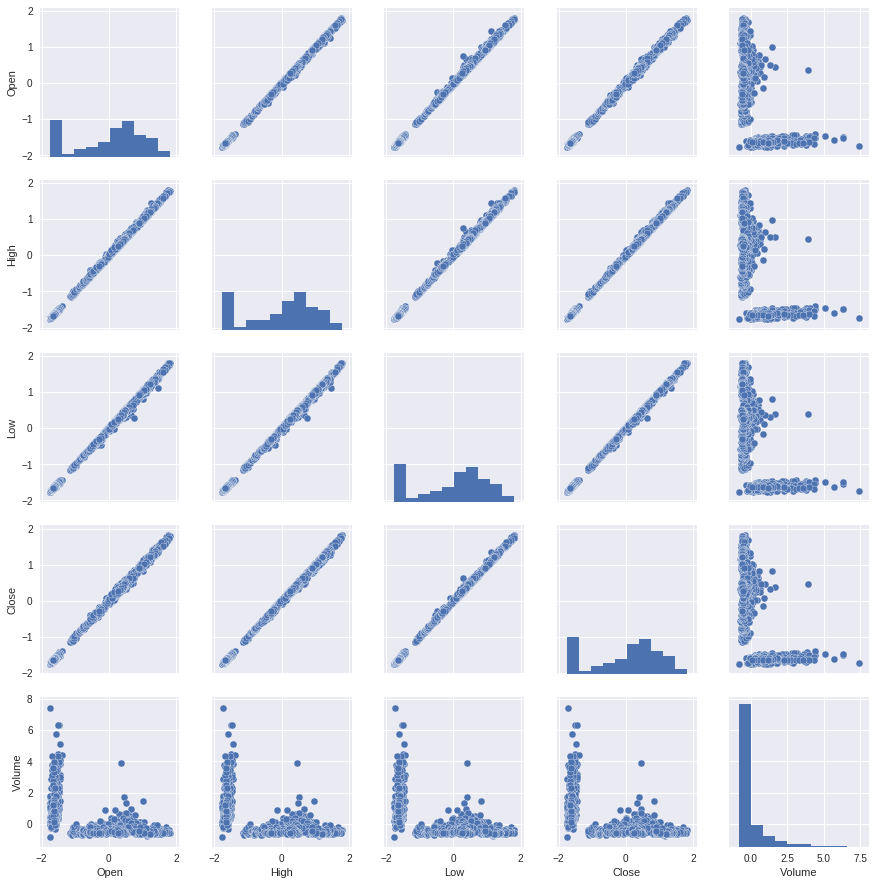

In [17]:
import seaborn as sns

sns.pairplot(sub_df)

If we would like to embed an interactive plot in Jupyter, we can use a library called Bokeh.

Let's use the Chart API provided by this library, which can directly plot from dataframes.

In [18]:
from bokeh import plotting, charts, io, resources

io.output_notebook(resources=resources.INLINE)

fig = (sub_df.pipe(charts.Scatter, "Volume", "Close"))

plotting.show(fig)

Loading BokehJS ...

Question: What other types of data would be interesting to analyze with these tools?